## Pressure and entrainment time series 

Additional analysis of pressure and entrainment timeseries to address Reviewer 2's comment 7 to the paper: Burgos-Cuevas et al. (2022) Experimental downslope gravity currents over a synthetic topography.

Comment:

*7) Once you have time series of ´Entrainment E (fig 4) and Pressure P (fig 6), try to characterize those series: standard deviation and typical length of peaks calculable from autocorrelation function. Then You can compare flat and topographic surface more effectively.*

The thing is, we don't have pressure timeseries for the smooth bottom experiments, so we can't compare to the experiment with rough topography; but we can compare entrainment.





In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
import seaborn as sns

### Pressure

Time series of pressure at each station (6 stations), experiment TL01 (figure 7 of R1 manuscript). TL01 is the lowest section of the topographic slope.

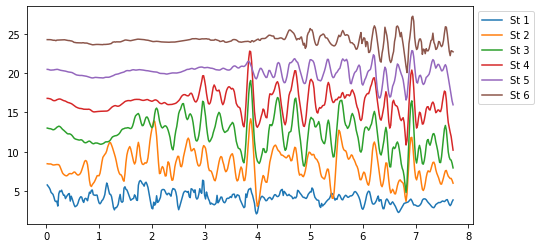

In [12]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

for st in range(1,7):
    filename = ('GCer07_Pres%d_c1.txt' %st)
    df = pd.read_csv(filename, sep='\t', names=['time','pressure'])
    pres = df.pressure
    time = df.time
    offset = (st*4)
    ax.plot(time, pres+offset, label='St %d' %st)
ax.legend(bbox_to_anchor=(1,1))

In [4]:
samp_freq = 1/(df.time[5]-df.time[4])

What are those peaks that line up at 4 s and 7 s?

Text(0, 0.5, 'PSD')

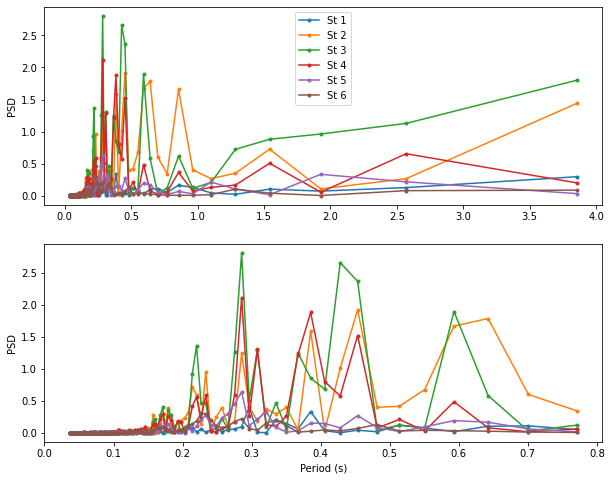

In [29]:
fig,(ax,ax2) = plt.subplots(2,1,figsize=(10,8))

for st in range(1,7):
    filename = ('GCer07_Pres%d_c1.txt' %st)
    df = pd.read_csv(filename, sep='\t', names=['time','pressure'])
    freq, psd = signal.periodogram(df.pressure, samp_freq, detrend='constant')
    ax.plot(1/freq[2:], psd[2:],'.-', label='St %d' %st)
    ax2.plot(1/freq[10:], psd[10:],'.-', label='St %d' %st)

ax.legend()
ax2.set_xlabel('Period (s)')
ax.set_ylabel('PSD')
ax2.set_ylabel('PSD')


### Entrainment

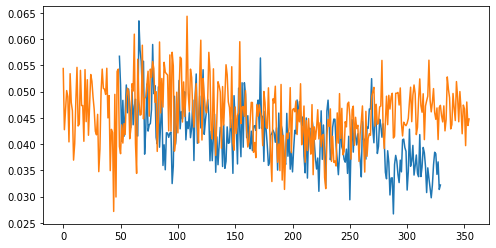

In [17]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

filename_liso = ('EntrainmentGCe29liso_exp.dat')
df_liso = pd.read_csv(filename_liso, sep='\t', names=['E'], na_values='NaN')

filename_topo = ('EntrainmentGCer07_exp.dat')
df_topo = pd.read_csv(filename_topo, sep='\t', names=['E'], na_values='NaN')

ax.plot(df_liso.E)
ax.plot(df_topo.E)


In [19]:
mean_liso = df_liso.E.mean()
mean_topo = df_topo.E.mean()

print(mean_liso, mean_topo)

0.04152108185053382 0.045871307042253534


In [20]:
std_liso = df_liso.E.std()
std_topo = df_topo.E.std()

print(std_liso, std_topo)

0.005784230511583515 0.005669189365405424


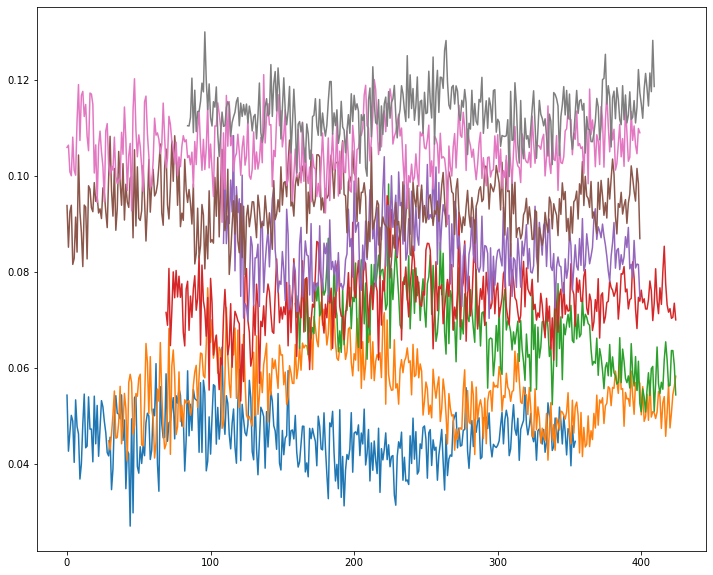

In [29]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
exps = ['07','24','25','28','29','30','31','34']

for exp, ii in zip(exps, range(len(exps))):
    filename = ('EntrainmentGCer%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    offset = (ii*0.01)
    ax.plot(df.E+offset)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf 
#From https://www.alpharithms.com/autocorrelation-time-series-python-432909/

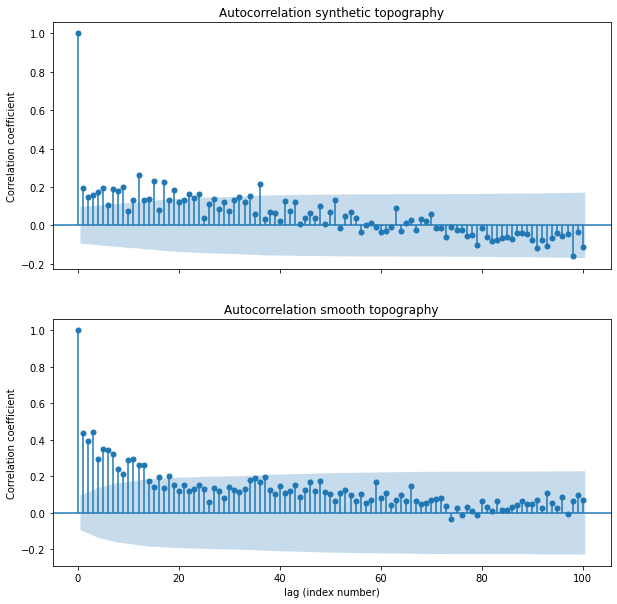

In [82]:
fig, (ax,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True)
# Use the Autocorrelation function from the statsmodel library passing our
# DataFrame object in as the data
plot_acf(df_topo.E,ax=ax, lags=100, missing='drop', 
              title='Autocorrelation synthetic topography')
plot_acf(df_liso.E,ax=ax2, lags=100, missing='drop', 
               title='Autocorrelation smooth topography')
ax.set_ylabel('Correlation coefficient')
ax2.set_ylabel('Correlation coefficient')
ax2.set_xlabel('lag (index number)')

plt.show()

**How to read these plots**

The y-axis shows the correlalation coefficient between the original timeseries and the same timeseries "moved" by a particular lag value (dots). Lag is arbitrary here since there is no time associated with the values of E (there is but I don't know what it is).  Positive values mean positive correlation and negative values mean negative correlation. Of course, there is 100% positive correlation when the lag=0 (r=1), since we are just comparing the time series to itself. The shaded area is the confidence interval with a default value of α = 0.05 (95% confidence interval). Anything within this range represents a value that has no significant correlation with the most recent value of E.

**Interpretation**

Autocorrelation plots show a positive correlation between the value of entrainment and up to 24 values earlier for synthetic topo and 13 for smooth topo. Autocorrelation decreases as lag increases for flat topo, fast between 0 and 20, slower afterwards, although correlations are not significant. Correlation remain positive for all lag values between 0 and 100.

Autocorrelation also generally decreases with increasing lag for the synthetic topo experiment, but only after lag=12. Correlations become mostly negative after lag 57. 

**Longer lags**

For longer lags, correlations for F01 become negative, but still not significant, wile correlations for TL02 oscillate around 0, also not significant (see plot below)

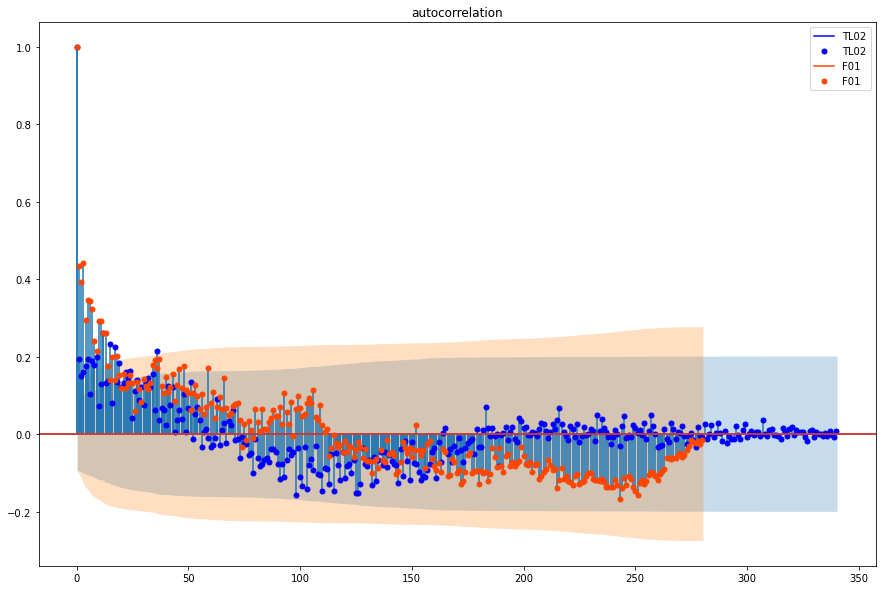

In [83]:
fig, (ax) = plt.subplots(1,1,figsize=(15,10))
plot_acf(df_topo.E,ax=ax, lags=340, missing='drop',  label='TL02',color='blue' )
plot_acf(df_liso.E,ax=ax, lags=280, missing='drop', title='autocorrelation', 
         label='F01',color='orangered')
ax.legend()
plt.show()

### Autocorrelation plots for all runs

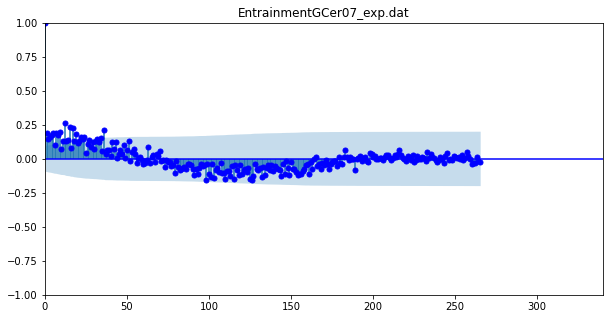

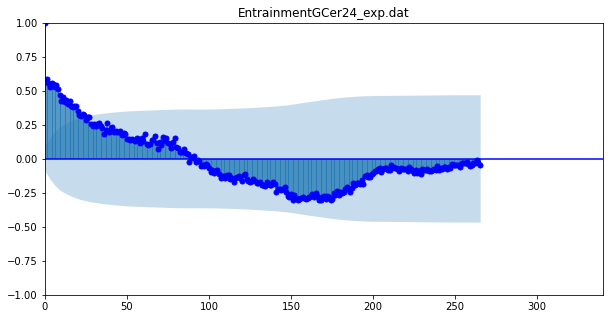

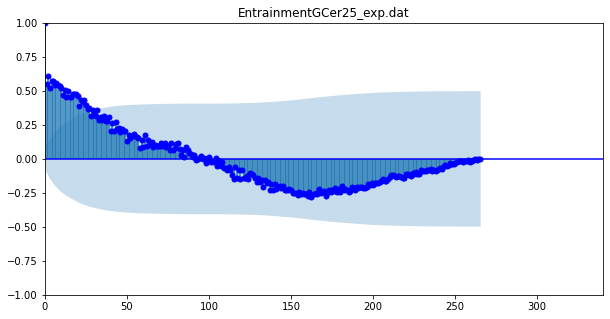

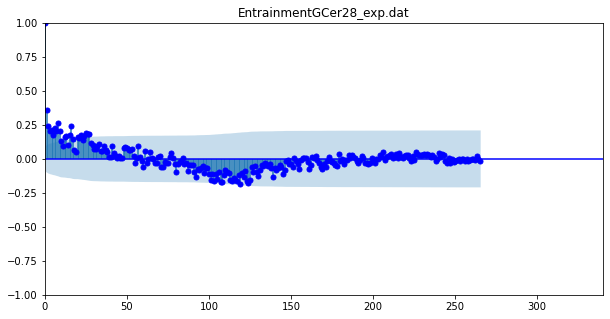

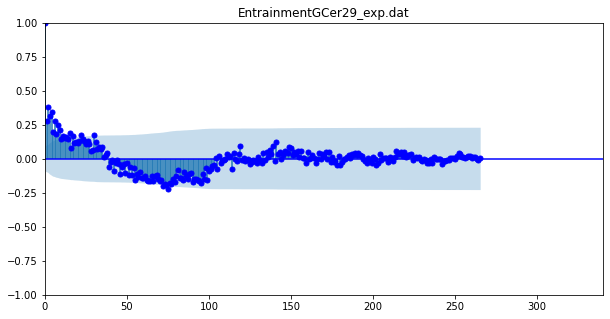

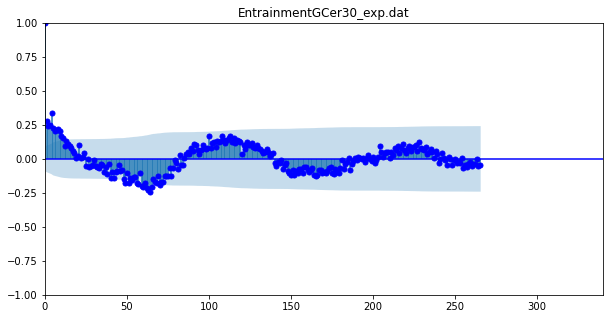

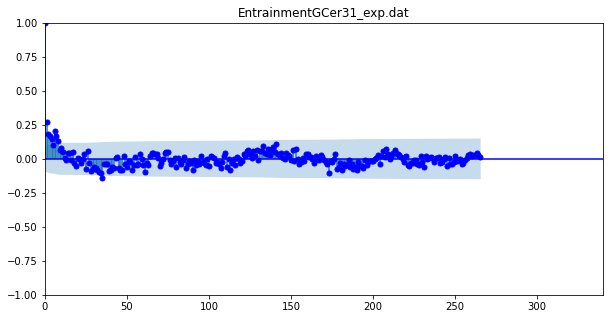

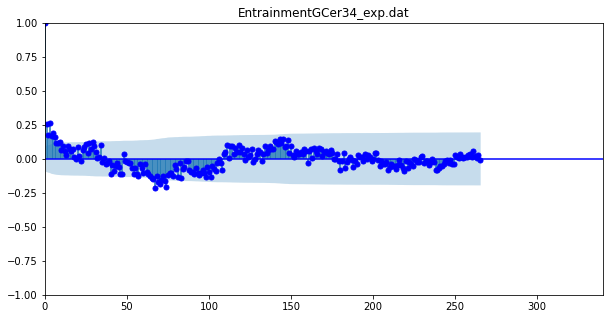

In [103]:
exps = ['07','24','25','28','29','30','31','34']

for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCer%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    plot_acf(df.E, ax=ax,lags=265, missing='drop',title=filename,color='blue')
    plt.xlim(0,340)
    plt.ylim(-1,1)
    plt.show()

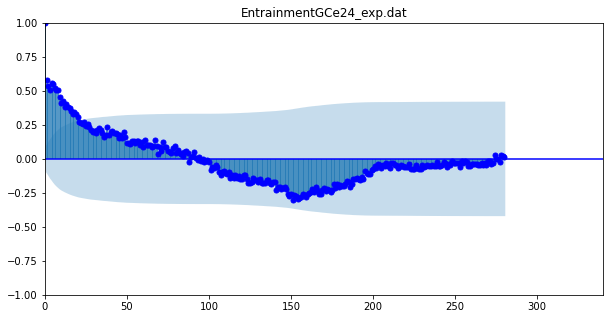

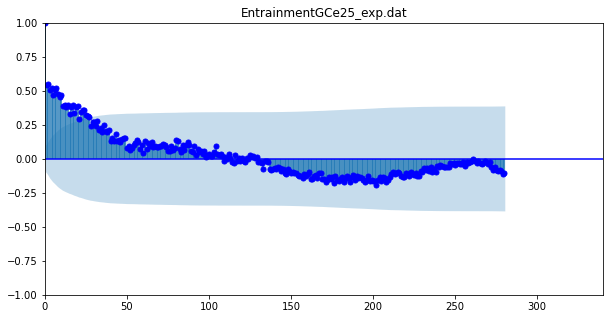

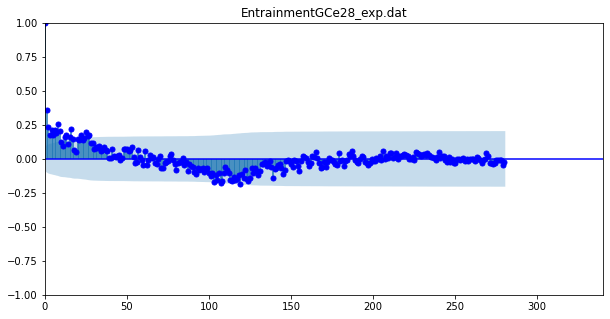

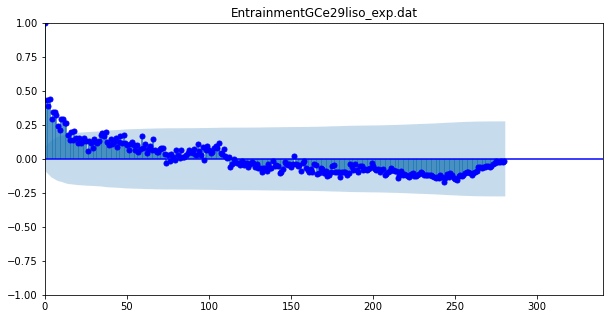

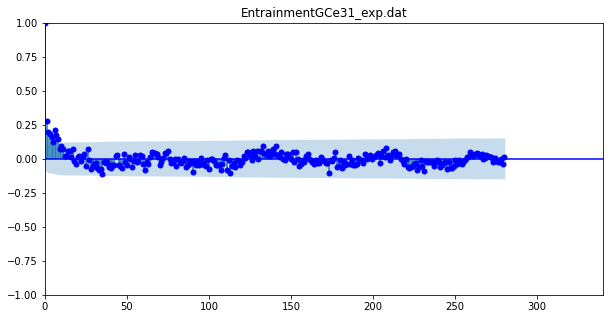

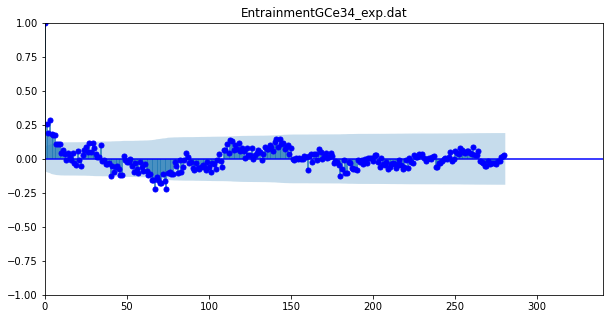

In [105]:
exps = ['24','25','28','29liso','31','34']

for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCe%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    plot_acf(df.E, ax=ax,lags=280, missing='drop',title=filename,color='blue')
    plt.xlim(0,340)
    plt.ylim(-1,1)
    plt.show()

### Frequency spectra for entrainment time series

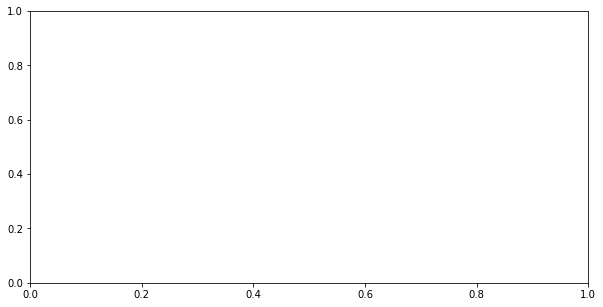

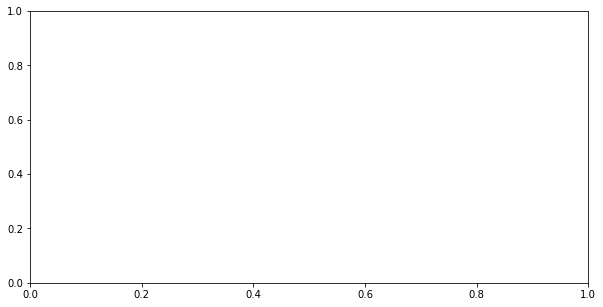

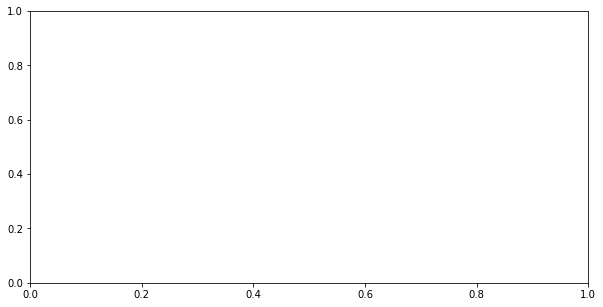

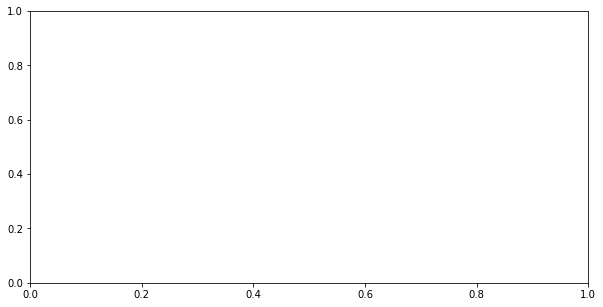

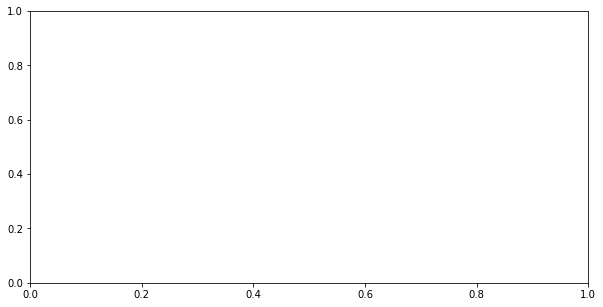

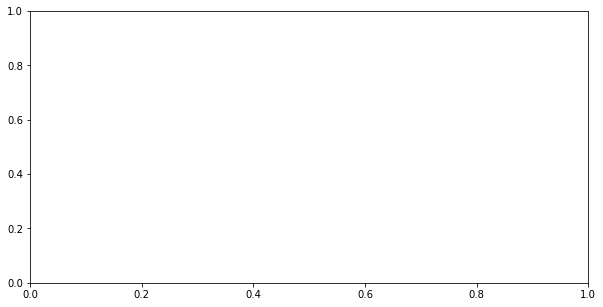

In [33]:
exps = ['24','25','28','29liso','31','34']
#samp_freq =  # Oops, I need the time associated to E to define this

for exp, ii in zip(exps, range(len(exps))):
    
    filename = ('EntrainmentGCe%s_exp.dat' %exp)
    df = pd.read_csv(filename, sep='\t', names=['E'], na_values='NaN')
    samp_freq = 1/(8/np.shape(df.E)[0])
    freq, psd = signal.periodogram(df.E[:], samp_freq, detrend='constant')
    fig, (ax) = plt.subplots(1,1,figsize=(10,5), sharex=True)
    plt.show()